## Task : Explore the tensorflow v1 framework and create a NN for signs dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.python.framework import ops
%matplotlib inline

#### In Tensorflow we do following steps : 
1. Create Tensors(Variables) that are not yet evaluated
2. Write out the operations between those Tensors
3. Initialize those Tensors
4. Create a Session
5. Run the Session

Let's run through a example

In [3]:
# we will create the loss function and print the loss
y_hat = tf.constant(36,name = 'y_hat') # a constant with value 36 and named as y_hat
y = tf.constant(39,name = 'y') # a constant with value 39 and named y

loss = tf.Variable((y-y_hat)**2,name = 'loss') # a variable loss that is needed to be evaluated

init = tf.global_variables_initializer() # when init is run later (in session.run(init)) the loss will be
                                         #initialized and will be ready to be computed/calculated
    
# Creating a session and printing output
with tf.Session() as session : 
    session.run(init) # initialize variables
    print(session.run(loss)) # print loss

9


In [4]:
# Let's understand it a bit more 
# take up 3 variables a,b,c as :

a = tf.constant(12)
b = tf.constant(2)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


we expected that c would give us 24, but it gave just a Tensor with nothing inside and of type int32, so what we did here is just put the operation in what tf team calls a computation graph and this graph hasn't been computed yet, inorder to do so we need to run a session. 

In [5]:
sess = tf.Session()
sess.run(c)

24

#### Learn a bit about placeholders now.
A placeholder is an object whose value you can specify only later. To specify values for a placeholder, you can pass in values by using a "feed dictionary" (feed_dict variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session.

In [6]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x : 3}))
sess.close()

6


Here we defined x but we need not to give any value to it, so a placeholder is simply a variable just with a difference that we can assign data to only later, when running the session

#### Let's create now some of the function that we use in our NNs

In [7]:
def linear_function() : 
    
    np.random.seed(1)
    
    x = tf.constant(np.random.randn(3,1),name = 'x')
    w = tf.constant(np.random.randn(4,3),name = 'w')
    b = tf.constant(np.random.randn(4,1),name = 'b')
    z = tf.add(tf.matmul(w,x),b)
    
    sess = tf.Session()
    result = sess.run(z)
    sess.close()
    return result

In [8]:
print(linear_function())

[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [9]:
def sigmoid(z) : 

    x = tf.placeholder(tf.float32,name = 'x')
    sigmoid = tf.sigmoid(x)
    
    with tf.Session() as sess : 
        result = sess.run(sigmoid,feed_dict = {x : z})
    return result

In [10]:
print(sigmoid(12))

0.9999939


In [11]:
def compute_cost(logits,labels) : 

    y_hat = tf.placeholder(tf.float32,name = 'y_hat')
    y = tf.placeholder(tf.float32,name = 'y')
    
    # Using the pre-made loss function
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_hat, labels = y)
    
    # initializing session
    sess = tf.Session()
    
    # running the session for cost computation
    cost = sess.run(cost,feed_dict = {y : labels,y_hat : logits})
    
    # closing session
    sess.close()
    
    return cost


In [13]:
logits = np.array([0.2,0.4,0.7,0.9])

cost = compute_cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [0.79813886 0.91301525 0.40318605 0.34115386]


### One hot Encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1).

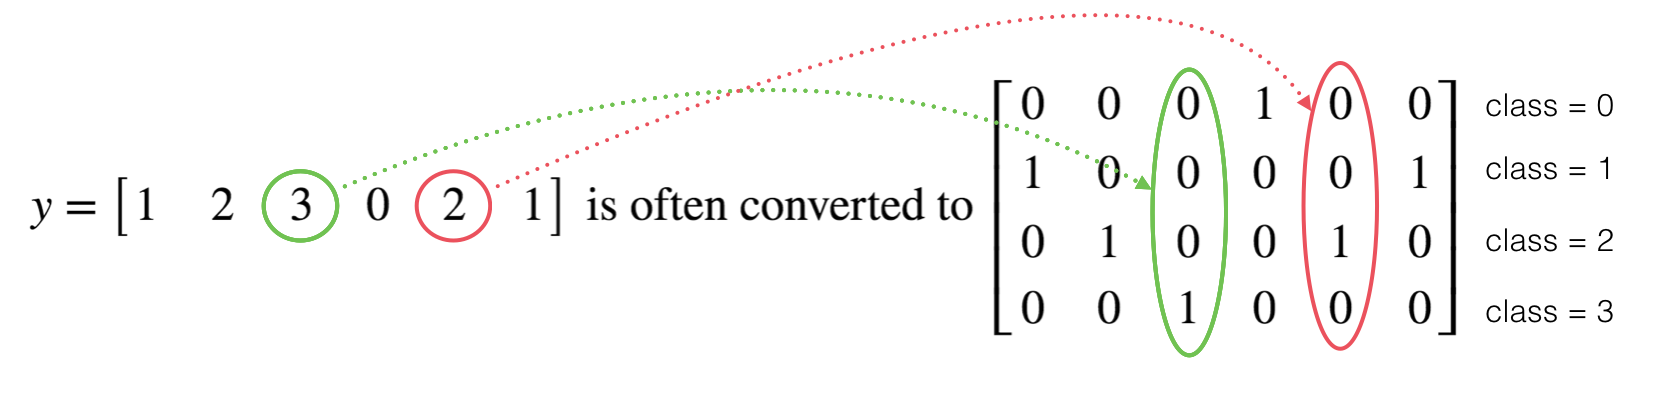

In [14]:
def one_hot_encode(labels,classes) : 
    
    C = tf.constant(classes,name = 'C')
    
    one_hot_matrix = tf.one_hot(labels,depth = C,axis = 0)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    
    return one_hot

In [15]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_encode(labels, classes = 4)
print ("one_hot = \n" + str(one_hot))

one_hot = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [16]:
def initialize_with_ones(shape) : 
    
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

# Neural Network in Tensorflow v1 !!

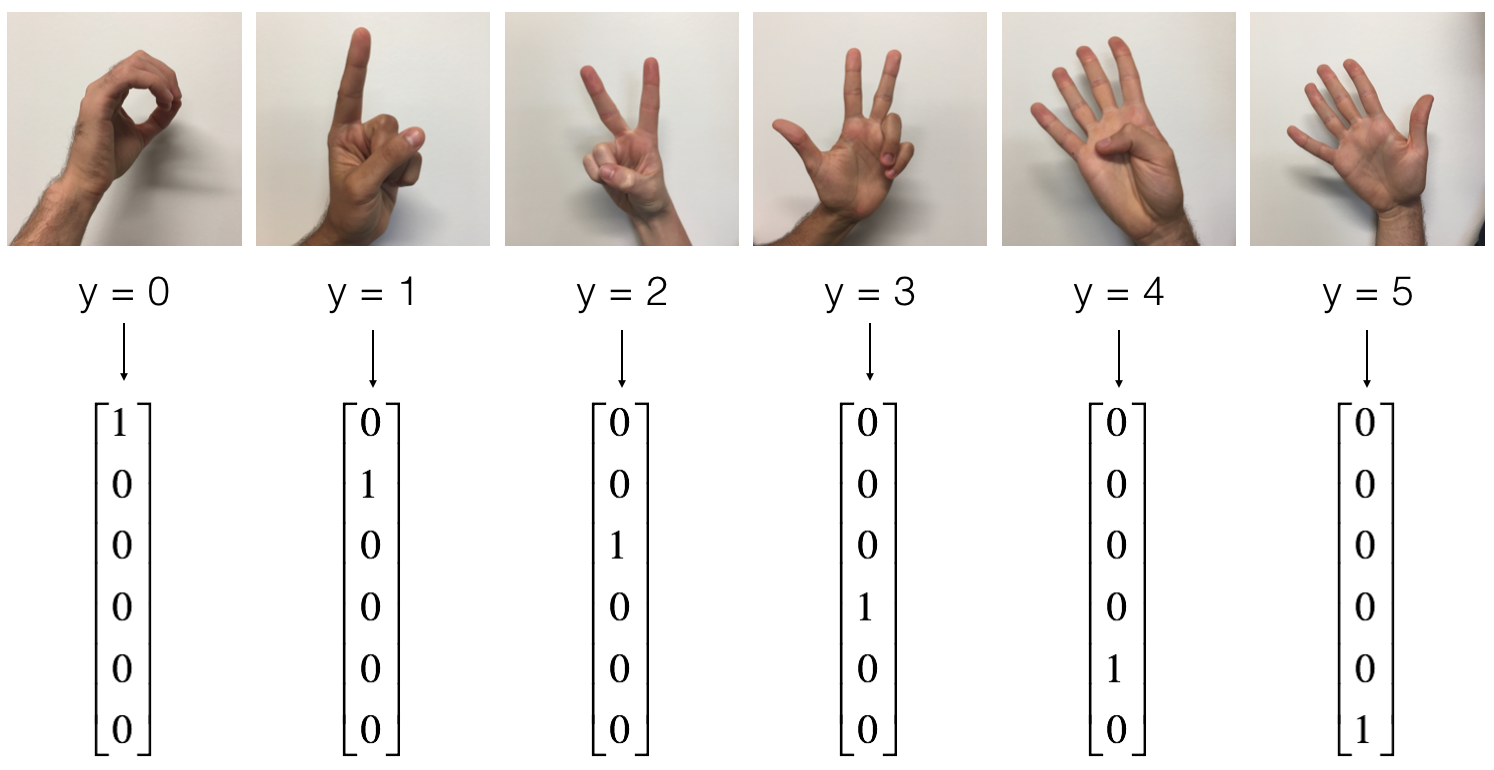

In [17]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [18]:
X_train,Y_train,X_test,Y_test,classes = load_dataset()

In [19]:
X_train.shape

(1080, 64, 64, 3)

y = [3]


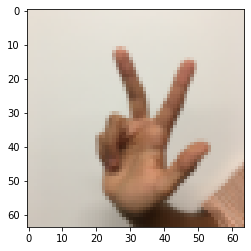

In [20]:
index = np.random.randint(0,1081)

plt.imshow(X_train[index])
print("y = " + str(Y_train[:,index]))

In [21]:
# reshaping into single vector
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T

# normalizing the vectors
X_train = X_train_flatten/255
X_test = X_test_flatten/255

In [22]:
# converting Y train and Y test vectors into one hot encoded matrices

In [23]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
Y_train = convert_to_one_hot(Y_train,6)
Y_test = convert_to_one_hot(Y_test,6)

In [24]:
# placeholders creation
def create_placeholders(nX,nY) : 
    X = tf.placeholder(shape = [nX,None],dtype = tf.float32,name = 'X')
    Y = tf.placeholder(shape = [nY,None],dtype = tf.float32,name = 'Y')
    return X,Y

In [25]:
X_test.shape

(12288, 120)

In [26]:
import tensorflow as tf2

In [ ]:
# initializing parameters function
def initialize_params() : 
    initializer=tf.initializers.glorot_uniform()
    
    w1 = tf.get_variable('w1',[25,12288],initializer=tf2.initializers.GlorotUniform())
    b1 = tf.get_variable('b1',[25,1],initializer=tf.zeros_initializer())
    w2 = tf.get_variable('w2',[12,25],initializer=tf2.initializers.GlorotUniform())
    b2 = tf.get_variable('b2',[12,1],initializer=tf.zeros_initializer())
    w3 = tf.get_variable('w3',[6,12],initializer=tf2.initializers.GlorotUniform())
    b3 = tf.get_variable('b3',[6,1],initializer=tf.zeros_initializer())
    
    params = {'w1' : w1,'b1':b1,'w2':w2,'b2':b2,'w3':w3,'b3':b3}
    return params

In [ ]:
# Forward prop
def forward_prop(X,parameters) : 
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    
    z1 = tf.add(tf.matmul(w1,X),b1)
    a1 = tf.nn.relu(z1)
    
    z2 = tf.add(tf.matmul(w2,a1),b2)
    a2 = tf.nn.relu(z2)
    
    z3 = tf.add(tf.matmul(w3,a2),b3)
    
    return z3

In [ ]:
# Loss function 
def compute_cost(z3,Y) : 
    
    # while using tf.nn.softmax_cross_entropy_with_logits as we need
    # the logits and labels in shape(#examples,#classes) which is transpose of input z3 and Y
    logits =tf.transpose(z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels))
    return cost

## For Backpropogation step, be grateful to these frameworks

This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After you compute the cost function. You will create an "optimizer" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

To make the optimization you would do:

_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})


This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to 
inputs.

In [138]:
def mini_batches_generator(X,Y,mini_batch_size = 64, seed = 0) : 
    
    np.random.seed(seed)
    m =X.shape[1]
    mini_batches = []
    
    # Shuffling step 
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((Y.shape[0],m))
    
    # Partitioning step
    num_complete_minibatches = math.floor(m/mini_batch_size)
    
    for k in range(0,num_complete_minibatches) : 
        
        minibatch_X = shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
        minibatch_Y = shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]
        
        mini_batch =(minibatch_X,minibatch_Y)
        mini_batches.append(mini_batch)
        
    # for last most probaly incomplete mini_batch 
    if m % mini_batch_size != 0 :
        mini_batch_X = shuffled_X[:,int(m/mini_batch_size) : ]
        mini_batch_Y = shuffled_Y[:,int(m/mini_batch_size) : ]
        minibatch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(minibatch)
        
    return mini_batches

In [145]:
# Model
def model(X_train,Y_train,X_test,Y_test,learning_rate = 0.0001,epochs = 1500,minibatch_size = 64,print_cost = True):
    # To be able to re-run the model without overwriting the tf variables
    ops.reset_default_graph()
    seed = 3
    tf.set_random_seed(1)
    (nX,m) = X_train.shape
    nY = Y_train.shape[0]
    costs = []
    
    # initializing parameters
    X,Y = create_placeholders(nX,nY)
    parameters = initialize_params()
    
    # forward prop
    z3 = forward_prop(X,parameters)
    cost = compute_cost(z3,Y)
    
    # Backprop step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    # starting session
    
    with tf.Session() as sess : 
        
        sess.run(init)
        for epoch in range(epochs) : 
            
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed += 1
            minibatches = mini_batches_generator(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches : 
                (minibatch_X,minibatch_Y) = minibatch
                _,mini_cost = sess.run([optimizer,cost],feed_dict = {X : minibatch_X, Y: minibatch_Y})
                epoch_cost += mini_cost / num_minibatches
                
            if print_cost and epoch % 100 == 0 : 
                print("Cost after epoch {} : {}".format(epoch,epoch_cost))
            if print_cost and epoch % 5 == 0 : 
                costs.append(epoch_cost)
         # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters


In [146]:
import math

Cost after epoch 0 : 2.029088981449604
Cost after epoch 100 : 1.4314305484294891
Cost after epoch 200 : 1.313711829483509
Cost after epoch 300 : 1.223216898739338
Cost after epoch 400 : 1.1877904757857323
Cost after epoch 500 : 1.1283572427928448
Cost after epoch 600 : 1.06918316334486
Cost after epoch 700 : 1.0153601318597794
Cost after epoch 800 : 0.9762743934988976
Cost after epoch 900 : 0.931468553841114
Cost after epoch 1000 : 0.8668969571590424
Cost after epoch 1100 : 0.8256660737097263
Cost after epoch 1200 : 0.8045492991805077
Cost after epoch 1300 : 0.7265857793390751
Cost after epoch 1400 : 0.689376462250948


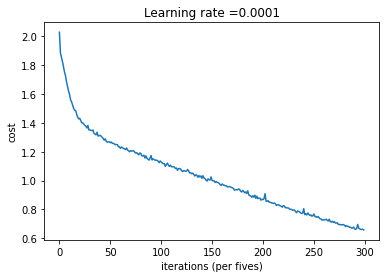

Parameters have been trained!
Train Accuracy: 0.76574075
Test Accuracy: 0.625


In [147]:
parameters = model(X_train, Y_train, X_test, Y_test)

|              **Train Accuracy**          | 0.76574075  |
|------------------------------------------|------------|
|              **Test Accuracy**           | 0.625 |

#### well we need to run a few more epochs and I need to tune the parameters too but still the tf v1 framework works great!

In [148]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["w1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["w2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["w3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"w1": W1,
              "b1": b1,
              "w2": W2,
              "b2": b2,
              "w3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['w1']
    b1 = parameters['b1']
    W2 = parameters['w2']
    b2 = parameters['b2']
    W3 = parameters['w3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    

Your algorithm predicts: y = 3


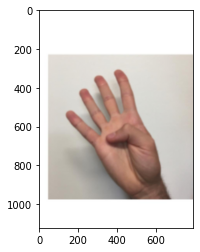

In [153]:
import scipy
from PIL import Image
from scipy import ndimage
import imageio
       
my_image = "4.jpg"

fname = "images/" + my_image
image = np.array(imageio.imread(fname))
image = image/255.
my_image = np.array(Image.fromarray((image * 255).astype(np.uint8)).resize((64, 64))).reshape((1,64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))



Well this is not 3 but I guess we all commit mistakes at some point don't we.. so, we shouldn't be harsh on a little neural network.